In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

In [2]:
OUTPUT_DIR = "data/data_outputs_bank"
UTILITY_PATH = os.path.join(OUTPUT_DIR, "utility_results_bank.csv")
MIA_PATH = os.path.join(OUTPUT_DIR, "model_mia_auc_bank.json")


In [3]:
# --- Load data ---
utility_df = pd.read_csv(UTILITY_PATH)
with open(MIA_PATH, "r") as f:
    mia_aucs = json.load(f)



In [4]:

# --- Prepare Random Forest subset only (exclude 'Real' for privacy) ---
rf_df = utility_df[
    (utility_df["Model"] == "RandomForest") & 
    (utility_df["Trained_On"].str.lower() != "real")
].copy()

# --- Add MIA AUC values ---
rf_df["Privacy_AUC"] = rf_df["Trained_On"].str.lower().map(mia_aucs)



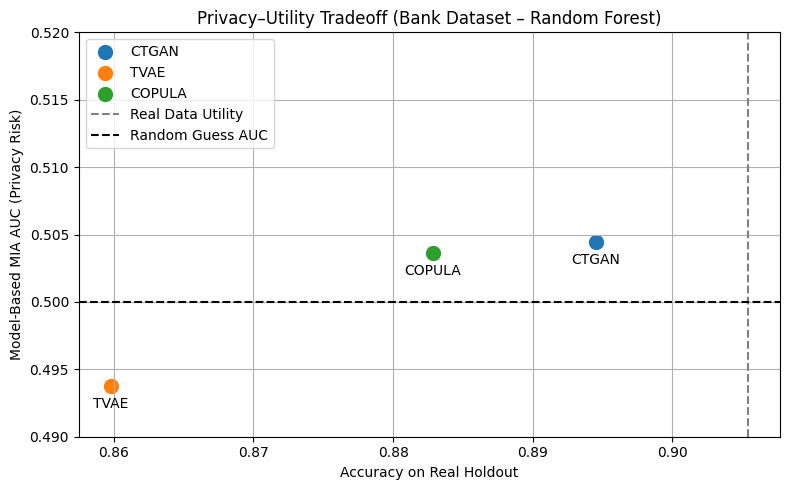

In [6]:

import os

# Consistent color mapping for all datasets
color_map = {
    "CTGAN": "tab:blue",
    "TVAE": "tab:orange",
    "COPULA": "tab:green"
}


plt.figure(figsize=(8, 5))
used_labels = set()

for _, row in rf_df.iterrows():
    model = row["Trained_On"].upper()
    x = row["Accuracy"]
    y = row["Privacy_AUC"]

    color = color_map.get(model, "gray")
    label = model if model not in used_labels else "_nolegend_"

    plt.scatter(x, y, color=color, label=label, s=100)
    plt.annotate(model, (x, y), textcoords="offset points", xytext=(0, -16), ha='center')
    used_labels.add(model)

# Baseline reference lines
real_acc = utility_df[
    (utility_df["Model"] == "RandomForest") & 
    (utility_df["Trained_On"].str.lower() == "real")
]["Accuracy"].values[0]

plt.axvline(real_acc, linestyle="--", color="gray", label="Real Data Utility")
plt.axhline(0.5, linestyle="--", color="black", label="Random Guess AUC")

plt.title("Privacy–Utility Tradeoff (Bank Dataset – Random Forest)")
plt.xlabel("Accuracy on Real Holdout")
plt.ylabel("Model-Based MIA AUC (Privacy Risk)")
plt.ylim(0.49, 0.52)
plt.grid(True)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "privacy_utility_tradeoff_bank.png"))
plt.show()
